![Fire](thomas-fire.jpg)

# About

The Thomas Fire burned over 280,000 acres (about 440 square miles) across Ventura and Santa Barbara counties in December 2017, the largest wildfire in modern California history at the time. The main catalyst for the fire's rapid spread was unseasonably strong Santa Ana wind that brought warm air and low humidity. In the end, 1,063 structures were lost, over 104,607 residents were forced to leave their homes, and damages totaled over $2.2 billion. Lasting environmental effects of the fire included poor air quality and mudflows during the successive rainy season as a result of the vegetation loss[^1].

[^1]: Read more about the Thomas fire [here](https://en.wikipedia.org/wiki/Thomas_Fire).

The first analysis[^2] uses imagery taken by [Landsat 8](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) on January 16, 2018 to highlight the burn scar left by the Thomas Fire after it was considered fully contained (January 12, 2018). By assigning infrared bands to visible colors (short wave infrared to 'red', near infrared to 'green', and red to 'blue'), we can easily distinguish the burn scar from the surrounding vegetation. Bare earth/dead vegetation reflects swir (short wave infrared), appearing red, and healthy vegetation reflects nir (near infrared), appearing green, in the false color image[^3]. We can then match the burn scar with the Thomas Fire perimeter, isolated from a [fire perimeters dataset](https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436).

[^2]: This analysis was part of EDS 220: Working with Environmental Datasets - Homework Assignment 4. See the assignment guidelines [here](https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html).

[^3]: Read more about false color imagery [here](https://earthobservatory.nasa.gov/features/FalseColor).

The second analysis[^4] uses [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact of the Thomas Fire on the AQI of Santa Barbara County from 2017-2018.

[^4]: This analysis was part of EDS 220: Working with Environmental Datasets - Homework Assignment 2. See the assignment guidelines [here](https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment2.html).


# Highlights

Analysis 1:

- This task explores assigning infrared bands to visible colors to obtain false color imagery.

- Necessary steps include cleaning rasters with the `rioxarray` package as well as filtering geo-dataframes with `geopandas` package.

- It is essential to match the Coordinate Reference Systems (CRSs) of shapefiles and rasters to obtain the final figure.

Analysis 2:

- This task uses `pandas` to wrangle dataframes.

- It requires working with various datatypes, such as dates.

- Using `matplotlib.pyplot`, we can create engaging visualizations!


# Repository 

More detailed information can be found on my [Thomas Fire GitHub Repository](https://github.com/ceh58/thomas-fire-analysis).

#### Repository structure:

```
├── data
│  ├── thomas_fire.cpg
│  ├── thoams_fire.dbf
│  ├── thomas_fire.prj
│  ├── thomas_fire.shp
│  └── thomas_fire.shx
├── .gitignore
├── README.md
├── aqi-analysis.ipynb
├── false-color-analysis.ipynb
└── fire-perimeter.ipynb
```


# Dataset Descriptions

Landsat Data:

The Landsat dataset used in this analysis is a cleaned, simplified collection of bands (red, green, blue, nir, swir) from [Landsat Collection 2 Level-2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) (collected by Landsat 8 satellite) that was prepared specifically for this project. 

Fire Perimeters Data:

The [fire perimeters dataset](https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436) is an open-source dataset that contains information about the spatial distrubtion of past fires in California published by the State of California (and downloaded as a shapefile). 

AQI Data:

This analysis directly imports the US AQI (by county) data for [2017](https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip) and [2018](https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip) via zip file. Both datasets will need to be filtered for Santa Barbara county.


# Analysis

#### Part 1

Derived from `fire-perimeter.ipynb`.

First, import all necessary packages.

In [1]:
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray as rioxr

Then, import the fire perimeters dataset (shapefile) and filter for the 2017 Thomas Fire. Save the filtered dataset in a format of your choice. I chose to save it as a shapefile due to its versatility and familiarity.

*Note: I saved the full fire perimeters dataset in my data/ folder in a separate no_push/ folder that was added to my .gitignore due to the size of the data.*

In [2]:
# Create filepath
fp = os.path.join("data", "no_push", "California_Fire_Perimeters_(all).shp")

# Read in data
fire_perimeter = gpd.read_file(fp)

# Lower column names
fire_perimeter.rename(columns=str.lower, inplace=True)

# Select Thomas Fire boundary by filtering for name and year
thomas_fire = fire_perimeter.loc[(fire_perimeter['fire_name'] == "THOMAS") & 
                                 (fire_perimeter['year_']== 2017)]
                                 
# Save Thomas Fire boundary as a shapefile
thomas_fire.to_file(os.path.join("data", "thomas_fire.shp"))

#### Part 2

Derived from `false-color-analysis.ipynb`.

First, import the landsat data (which has been pre-processed and saved on the server at the given filepath: `/courses/EDS220/data/hwk4_landsat_data", "landsat8-2018-01-26-sb-simplified.nc`).

In [3]:
# Import data
fp = os.path.join("/courses/EDS220/data/hwk4_landsat_data", "landsat8-2018-01-26-sb-simplified.nc")
landsat = rioxr.open_rasterio(fp)
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

Notice that the raster has a dimension, `band`, of size one. This dimension is not necessary, so we will use the `squeeze()` and `drop_vars()` functions to remove it. Confirm that `band` no longer appears on the list of dimensions (`landsat.dims`).

In [4]:
# Drop the 'band' dimension
landsat = landsat.squeeze().drop_vars('band')

# Confirm 'band' was dropped
print(landsat.dims, landsat.coords)

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


Now we can plot a true color image. To do this, we must select the 'red', 'green', and 'blue' bands, in that order, and assign them to the 'red', 'green', and 'blue' colors using `.imshow()`. Since there are outliers in these data, the initial plot is black and white and gives us the following warning message:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


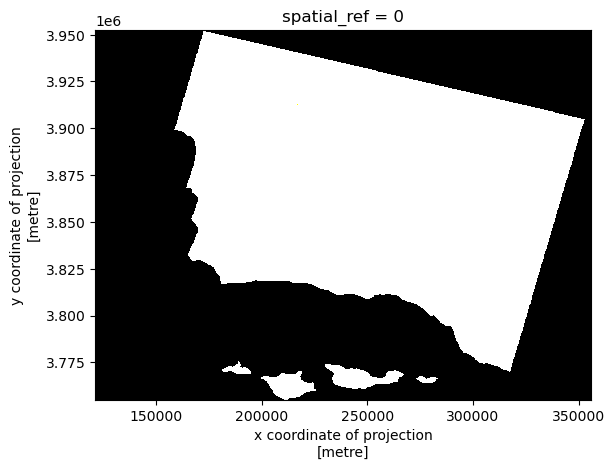

In [5]:
# Select 'red', 'green', and 'blue' variables and plot
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

In order to de-weight the outliers and properly scale each band, we will set the `robust` parameter in `.imshow()` to `True`. This produces our true color image:

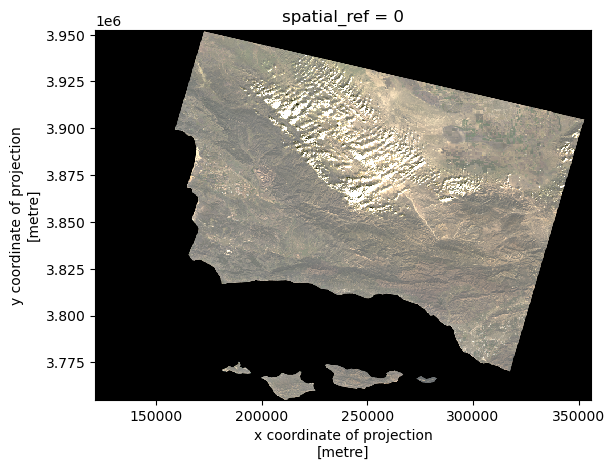

In [6]:
# Adjust the scale for a true color plot
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

To create our false color image, we must assign the short wave infrared band ('swir22') to the 'red' color, the near infrared band ('nir08') to the 'green' color, and 'red' band to the 'blue' color using the same function.

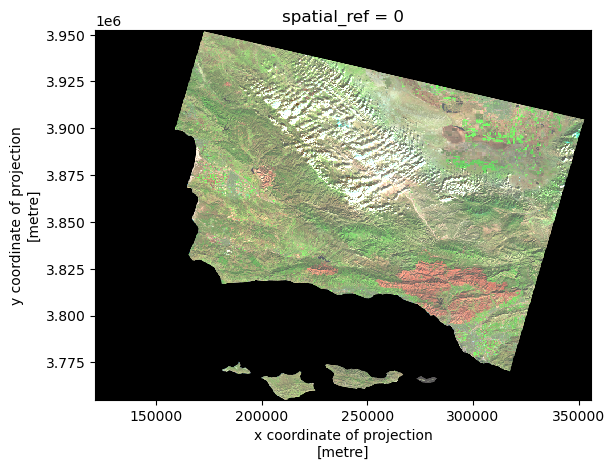

In [7]:
# Create a false color image
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

Finally, we can create our figure.

In order to do this, we must import the Thomas Fire perimeter shapefile we previously saved in Part 1, `thomas_fire.shp`. Check to see that the CRS of the shapefile matches that of the landsat data using `.crs` (from the `geopandas` package) for the shapefile and `.rio.crs` (from the `rioxarray` package) for the raster data. 

In [8]:
# Import Thomas Fire shapefile
thomas_fire = gpd.read_file(os.path.join("data", "thomas_fire.shp"))

# Make sure CRSs match
if thomas_fire.crs == landsat.rio.crs:
    print("CRSs match!")
else:
    landsat = landsat.rio.reproject(thomas_fire.crs)
    assert landsat.rio.crs == thomas_fire.crs
    print("We matched the CRSs!")

We matched the CRSs!


To plot the image, we must create an aspect ratio to correctly display the size. The aspect ratio is the width/height. 

In [9]:
# Map the false color image with the fire perimeter
landsat_aspect_ratio = landsat.rio.width/landsat.rio.height

Then, the figure is set up using the aspect ratio, and each figure element is plotted in sequence using the `matplotlib` package. Our final figure shows the burn scar of the Thomas Fire, displayed in red, outlined by the fire boundary. 

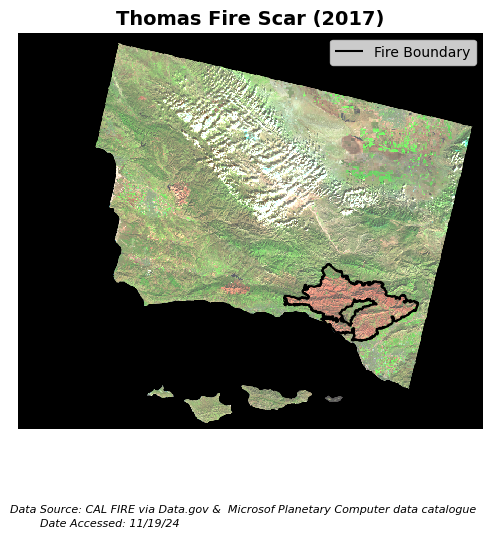

In [10]:
# Setup figure
fig, ax = plt.subplots(figsize = (6, 6*landsat_aspect_ratio))

# Turn the axis off
ax.axis("off")

# Plot the false color image on the figure
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax,
                                                        robust = True)

# Add Thomas Fire shapefile as a boundary on the figure
thomas_fire.boundary.plot(ax = ax,
                         color = "black")

# Add legend to the figure
ax.legend(labels = ["Fire Boundary"])

# Add annotation to the figure
fig.text(0.5, 0.1,
        'Data Source: CAL FIRE via Data.gov &  Microsof Planetary Computer data catalogue',
         ha='center', va='center', fontsize=8, color='black', fontstyle='italic')

fig.text(0.395, 0.08, 
         'Date Accessed: 11/19/24',
         ha='right', va='center', fontsize=8, color='black', fontstyle='italic')

# Add title
ax.set_title("Thomas Fire Scar (2017)", fontsize=14, fontweight='bold')

plt.show()

#### Part 3

Derived from `aqi-analysis.ipynb`.

First, Next, read in the data from the links and concat (stack) the dataframes. Then, clean the column names.

In [11]:
# Read in data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip", compression = 'zip')
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip", compression = 'zip')

# Concat the two data frames
aqi = pd.concat([aqi_17, aqi_18])

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))

Filter for county "Santa Barbara," and remove the `state_name`, `county_name`, `state_code`, and `county_code` columns.

In [12]:
# Select only data from Santa Barbara County
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# Remove specified columns
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])

Update the `date` column to `datetime` object, and then set it as the index.

In [13]:
# Update `date` to datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# Update the index to be the date column
aqi_sb = aqi_sb.set_index('date')

Calculate the 5-day rolling mean, and add it as a new column.

In [14]:
# Add AQI 5-day rolling mean to `aqi_sb` data frame
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

Plot the AQI for Santa Barbara county 2017-2018.

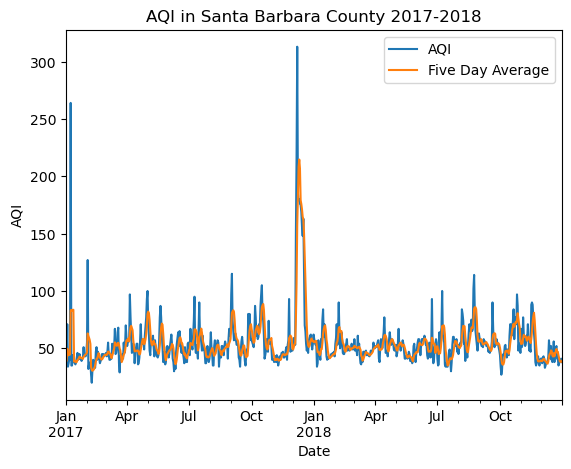

In [15]:
# Plot AQI and AQI rolling mean 
aqi_sb.drop(columns = 'number_of_sites_reporting').plot.line(y = ['aqi', 'five_day_average'])

# Add title
plt.title("AQI in Santa Barbara County 2017-2018")

# Label x-axis
plt.xlabel("Date")

# Label y-axis
plt.ylabel("AQI")

# Add legend
plt.legend(['AQI', 'Five Day Average'])

Our graph clearly shows a spike in AQI at the time of the Thomas Fire.

# References

Landsat data:

Landsat Collection 2 Level-2, Microsoft Open Source, Matt McFarland, Rob Emanuele, Dan Morris, & Tom Augspurger. (2022). microsoft/PlanetaryComputer: October 2022 (2022.10.28). Zenodo. [https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) Accessed: November 19, 2024

Fire perimeter data:

State of California, Kimberly Wallin. (2024). CAL FIRE: May 2024 (2024.05.14). [https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436](https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436) Accessed: November 19, 2024

AQI Data:

U.S. Enivornmental Protection Agency. (2024). Air Quality Index Daily Values Report: July 2024 (2024.07.23). [https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report](https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report) Accessed: October 22, 2024
